## Results

Comparison of evaluation among all models.

The target classed of the arXiv dataset are highly imbalanced. When dealing with imbalanced classification in a multi class problem, choosing the right evaluation metric is crucial. The F1 score is a commonly used metric in this scenario as it considers both precision and recall, making it suitable for imbalanced datasets where one or more classes have a small number of samples. The F1 score can provide a balanced assessment of the model's performance across all classes, regardless of the class distribution. This is particularly useful when the goal is to identify and correctly classify instances of all classes, rather than just the majority class.

Accuracy, calculated as the total proportion of correct predictions, on other hand, can be misleading in cases with high imbalance such as this one. The majority class will bias the evaluation as it will always inflate the accuracy score, giving a false impression of the actual performance of the model.

F1 = 2 * (precision * recall) / (precision + recall),

where precision is the proportion of predictions identified as belonging to a class that actually belong to that class. Recall is the proportion of positive predictions, with respect to a class, that were identified correctly.

Each model was trained on the same training set and validated on the same validation set against the same metrics. The results obtained on the validation set at each stage were logged and compared at the end.

The testing set was left untouched throughout the course of the project, in order to minimise any bias. Only at the end, the model that achieved the highest score was used to make predictions on the testing data.

#### summary of models

**NBtfifd1_val**: Multinomial Naïve Bayes with unigrams TF-IDF feature representation<br/>
**NBtfifd2_val**: Multinomial Naïve Bayes with bigrams TF-IDF feature representation<br/>
**LRtfidf1_val**: Logistic Regression with unigrams TF-IDF feature representation<br/>
**LRtfidf2_val**: Logistic Regression with bigrams TF-IDF feature representation<br/>
**NBw2vgoog_val**: Multinomial Naïve Bayes with average pre-trained Google News Word2Vec Embeddings<br/>
**LRw2vgoog_val**: Logistic Regression with average pre-trained Google News Word2Vec Embeddings<br/>
**LRw2vgoogCWbal_val**: Logistic Regression with average pre-trained Google News Word2Vec Embeddings and default balanced class weighting<br/>
**LRw2vgoogCWgscv_val**: Logistic Regression with average pre-trained Google News Word2Vec Embeddings and custom class weighting from grid-search-cv<br/>
**LRw2vgoogUnder_val**: Logistic Regression with average pre-trained Google News Word2Vec Embeddings and random under sampling<br/>
**LRw2vgoogOver_val**: Logistic Regression with average pre-trained Google News Word2Vec Embeddings and random over sampling<br/>
**LRw2vgoogSmote_val**: Logistic Regression with average pre-trained Google News Word2Vec Embeddings and smote<br/>
**DistilBERT1_val**: Fine- tuned Simple Neural Network (GlobalMaxPool1D) with pre-trained DistilBERT Embeddings<br/>
**DistilBERT2_val**: Fine- tuned Simple Neural Network (Bidirectional + GlobalMaxPool1D) with pre-trained DistilBERT Embeddings<br/>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from plottingutils import *

dir_ = '../results/'
files = os.listdir(dir_ )
files = [f for f in files if f[-4:] == '.pkl']

dfs = []
for f in files:
    tmp = pd.read_pickle(dir_+f)
    dfs.append(tmp)
result_df = pd.concat(dfs, ignore_index=True)
result_df.rename(columns={"Description":"Model"}, inplace=True)

Model DistilBERT2 achieved the highest F1 score on the validation set and can be used to make predictions on the test data and obtain the final results of the project.

In [2]:
result_df

,Model,Accuracy,Precision,Recall,F1-score
0,NBw2vgoog_val,0.548778,0.137194,0.250000,0.177165
1,LRw2vgoog_val,0.865571,0.780205,0.746949,0.758249
2,LRw2vgoogCWbal_val,0.838469,0.734362,0.797831,0.750896
3,LRw2vgoogCWgscv_val,0.842182,0.735224,0.793478,0.754493
4,LRw2vgoogUnder_val,0.833549,0.729796,0.795515,0.746056
5,LRw2vgoogOver_val,0.838698,0.734178,0.797239,0.750981
6,LRw2vgoogSmote_val,0.839575,0.734751,0.793872,0.750774
7,distilBert1_val,0.853934,0.754060,0.812856,0.764536
8,distilBert2_val,0.907060,0.817816,0.876936,0.835043
9,NBtfifd1_val,0.890324,0.805929,0.799524,0.800398


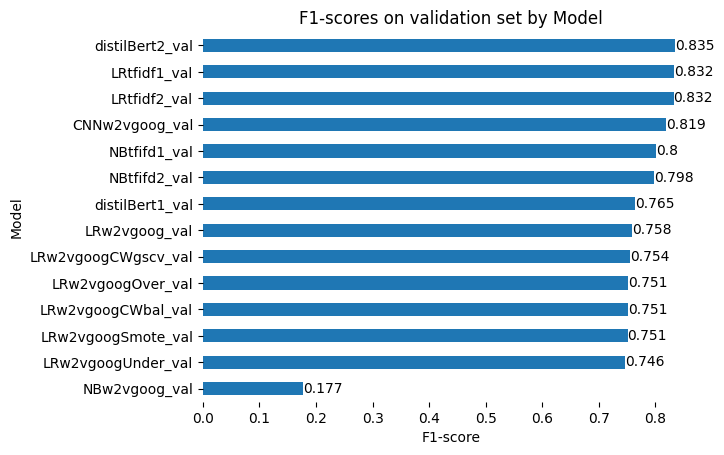

In [88]:
ax = result_df.sort_values("F1-score").plot.barh(x="Model", y="F1-score")
ax.grid=False
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
for i, v in enumerate(result_df["F1-score"].sort_values()):
    ax.text(v, i, str(round(v, 3)), color='black', ha='left', va='center')

ax.set_xlabel("F1-score")
ax.set_ylabel("Model")
ax.set_title("F1-scores on validation set by Model")
ax.legend().remove()
plt.show()

### Final evaluation on test set

See the previous notebook for an analysis of the winning model (distilBert2) on the test set.